In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## EDA (Data Exploratory Analisis)

In [2]:
# Primero voy a importar las hojas del dataset y los guardo en unos nuevos.

excel = pd.ExcelFile('./Datasets/homicidios.xlsx')

hojas = excel.sheet_names

hec = hojas[0]
vic = hojas[2]

hechos = pd.read_excel('./Datasets/homicidios.xlsx', sheet_name=hec)
victimas = pd.read_excel('./Datasets/homicidios.xlsx', sheet_name=vic)

In [ ]:
# Guardo los datasets en archivos csv
hechos.to_csv('./Datasets/Hechos.csv', index=False)
victimas.to_csv('./Datasets/Victimas.csv', index=False)

In [75]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [4]:
victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


### Valores Nulos

#### No parece haber nulos en el dataset 'Victimas'

#### Las siguientes columnas son las que poseen valores faltantes en el dataset 'Hechos'.

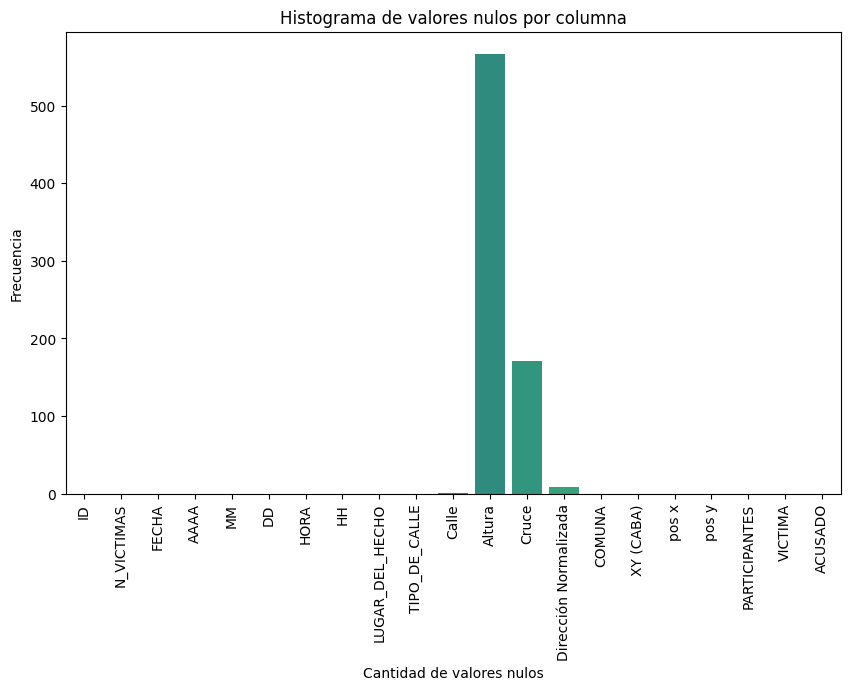

Nulos en Calle: 1 
Nulos en Altura: 567 
Nulos en Cruce: 171 
Nulos en Dirección normalizada: 8


In [4]:
columnas = list(hechos.columns)
nulos_por_columna = hechos.isnull().sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=columnas, y=nulos_por_columna, hue=columnas, palette='viridis', legend=False)
plt.title('Histograma de valores nulos por columna')
plt.xlabel('Cantidad de valores nulos')
plt.xticks(rotation=90)  
plt.ylabel('Frecuencia')
plt.show()

nullCalle = hechos['Calle'].isnull().sum()
nullAltura = hechos['Altura'].isnull().sum()
nullCruce = hechos['Cruce'].isnull().sum()
nullDir = hechos['Dirección Normalizada'].isnull().sum()

print(f'Nulos en Calle: {nullCalle} \nNulos en Altura: {nullAltura} \nNulos en Cruce: {nullCruce} \nNulos en Dirección normalizada: {nullDir}')

##
#### Faltan varios de los datos del único nulo de la columna Calle. Por lo que voy a proceder a elminar la fila entera.
Podemos ver que la Comuna de este dato es 0, sólo otro registro comparte esta Comuna y también es de dudoso, por lo que las eliminaré a ambas.

In [124]:
nullCalle = hechos[hechos['Calle'].isnull()]
nullCalle

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD


In [3]:
hechos = hechos.loc[hechos['COMUNA'] != 0]
hechos[hechos['COMUNA'] == 0]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


##
#### Siempre que haya valores nulos en la columna 'Dirección Normalizada' es porque el hecho se desarrolló en una Autopista, la cual figura en la columna 'LUGAR_DEL_HECHO'

In [126]:
nullDir = hechos[hechos['Dirección Normalizada'].isnull()]
nullDir

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,Point (. .),.,.,MOTO-SD,MOTO,SD
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,NaN,NaN,NaN,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,...,NaN,NaN,NaN,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),.,.,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
621,2021-0023,1,2021-03-01,2021,3,1,09:20:00,9,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS


##
#### Puedo relacionar los nulos de la columna Altura por varias razones:

A. El hecho se desarrolló en una Autopista.

B. El hecho se registró por el cruce de las calles y no se registró la altura.

C. El hecho se registró por la altura de la calle y no se rellenó la columna 'Altura' (En este caso podemos encontrar la información en la columna 'Dirección Normalizada').

D. Registro mal realizado en esa fila.

In [138]:
nullAltura = hechos[hechos['Altura'].isnull()]
nullAltura.sample(6)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
184,2017-0054,1,2017-05-07,2017,5,7,21:00:00,21,AV. DE LOS CONSTITUYENTES Y PEDRO MORAN,AVENIDA,...,NaN,"MORAN, PEDRO","DE LOS CONSTITUYENTES AV. y MORAN, PEDRO",15,Point (97843.76024114 104700.29820723),-58.48680218,-34.58689719,MOTO-AUTO,MOTO,AUTO
393,2018-0119,1,2018-11-05,2018,11,5,22:35:00,22,Rabanal y San Pedrito,AVENIDA,...,NaN,SAN PEDRITO,"RABANAL, FRANCISCO, INTENDENTE AV. y SAN PEDRITO",8,Point (102489.86457298 96266.15892101),-58.43613623,-34.66292532,PEATON-SD,PEATON,SD
48,2016-0068,1,2016-05-22,2016,5,22,22:00:00,22,AV FIGUEROA ALCORTA Y AV PUEYRREDON,AVENIDA,...,NaN,PUEYRREDON AV.,"FIGUEROA ALCORTA, PRES. AV. y PUEYRREDON AV.",2,Point (106673.12856878 104998.99234220),-58.39056593,-34.58418569,MOTO-PASAJEROS,MOTO,PASAJEROS
366,2018-0092,1,2018-08-20,2018,8,20,08:20:00,8,Cordoba Av. y Gascon,AVENIDA,...,NaN,GASCON,CORDOBA AV. y GASCON,14,Point (103662.91363929 103496.49206019),-58.42336930,-34.59774487,MOTO-AUTO,MOTO,AUTO
207,2017-0082,1,2017-06-25,2017,6,25,22:40:00,22,AV. ENTRE RIOS Y AV. BRASIL,AVENIDA,...,NaN,BRASIL,ENTRE RIOS AV. y BRASIL,4,Point (106636.30041967 99991.34072603),-58.39092851,-34.62932696,PEATON-AUTO,PEATON,AUTO
99,2016-0128,1,2016-10-02,2016,10,2,11:30:00,11,CASTRO Y AV PAVON,AVENIDA,...,NaN,PAVON AV.,CASTRO y PAVON AV.,5,Point (104049.28528337 99858.37522846),-58.41914024,-34.63053890,PEATON-PASAJEROS,PEATON,PASAJEROS


##
#### Así mismo, cuando en la columna Cruce aparece un valor puede ser por varias razones:

A. El hecho se registró con la altura de la calle y no por el cruce.

B. EL hecho se registró por el cruce de las calles pero no se rellenó la columna 'Cruce' (En este caso podemos encontrar la información en la columna 'Dirección Normalizada').

C. Registro mal realizado en esa fila.

In [128]:
nullCruce = hechos[hechos['Cruce'].isnull()]
nullCruce

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
9,2016-0013,1,2016-02-10,2016,2,10,11:30:00,11,AV ENTRE RIOS 1366,AVENIDA,...,1366.0,NaN,ENTRE RIOS AV. 1366,1,Point (106616.41069662 100496.44662323),-58.39114932,-34.62477387,PEATON-AUTO,PEATON,AUTO
14,2016-0020,1,2016-02-17,2016,2,17,16:00:00,16,SUIPACHA 156,CALLE,...,156.0,NaN,SUIPACHA 156,1,Point (107684.31807562 102519.17333314),-58.37952223,-34.60653282,PEATON-AUTO,PEATON,AUTO
33,2016-0047,1,2016-04-15,2016,4,15,05:30:00,5,LIMA 1483,CALLE,...,1483.0,NaN,LIMA 1483,1,Point (107412.19098904 100391.02557777),-58.38247061,-34.62571878,PEATON-PASAJEROS,PEATON,PASAJEROS
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,2021-0082,1,2021-11-06,2021,11,6,04:39:00,4,AU 25 DE MAYO KM7 (ALTURA PASCO),AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO y PASCO,3,Point (106179.07517962 100523.29161457),-58.39591856,-34.62453459,MOTO-AUTO,MOTO,AUTO
685,2021-0087,1,2021-11-27,2021,11,27,11:22:00,11,ESMERALDA 1359,CALLE,...,1359.0,NaN,ESMERALDA 1359,1,Point (107829.16426745 104166.84427133),-58.37795815,-34.59167894,PEATON-BICICLETA,PEATON,BICICLETA
687,2021-0089,1,2021-12-02,2021,12,2,01:10:00,1,AV. GAONA 3655,AVENIDA,...,3655.0,NaN,GAONA AV. 3655,11,Point (98804.41713890 100872.30706871),-58.47633683,-34.62140594,MOTO-AUTO,MOTO,AUTO
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


###
###
### Valores Duplicados

#### A. No se encuentran IDs duplicados en el dataset.
###
#### B. Tampoco hay registros que coincidan en una misma Fecha, Hora, Calle y Altura.

In [141]:
duplicados = hechos['ID'].duplicated()

filas_duplicadas = hechos[duplicados]
filas_duplicadas

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


In [143]:
dup_filas_fecha_hora = hechos[['FECHA', 'HORA', 'Calle', 'Altura']].duplicated()
filas_duplicadas_fecha_hora = hechos[dup_filas_fecha_hora]

filas_duplicadas

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


In [5]:
filas_duplicadas = victimas[victimas['ID_hecho'].duplicated()]
filas_duplicadas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
30,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2016-03-30 00:00:00
99,2016-0126,2016-09-18,2016,9,18,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,60,SD
164,2017-0026,2017-02-26,2017,2,26,CONDUCTOR,AUTO,MASCULINO,19,2017-02-26 00:00:00
174,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,32,2017-03-23 00:00:00
175,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,30,2017-03-23 00:00:00
177,2017-0036,2017-03-29,2017,3,29,CONDUCTOR,MOTO,MASCULINO,20,2017-03-29 00:00:00
187,2017-0050,2017-04-28,2017,4,28,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,16,2017-04-28 00:00:00
238,2017-0108,2017-09-02,2017,9,2,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,10,2017-09-02 00:00:00
243,2017-0112,2017-09-10,2017,9,10,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,SD,2017-09-13 00:00:00
254,2017-0126,2017-10-14,2017,10,14,CONDUCTOR,AUTO,MASCULINO,36,2017-10-14 00:00:00


###
###
###
### Análisis de Victimas / Acusados
###
#### A. Participantes con más registros.
* Los siniestros de Transporte de pasajeros hacia Peatones son los de mayor repetición, con su pico en 2018. Desde 2019 baja ese valor.

* Les sigue bastante por abajo la relación Auto - Moto. Sus valores son bastantes consistentes, con una caída en el 2020 (probablemente por la pandemia), pero en 2021 parece subir de vuelta y probablemente siga con una tendencia positiva.

#### B. Valores más altos.
* El auto es el vehículo que más figura en la columna Acusados.

* La moto es el vehículo que más figura en la columna Victima.

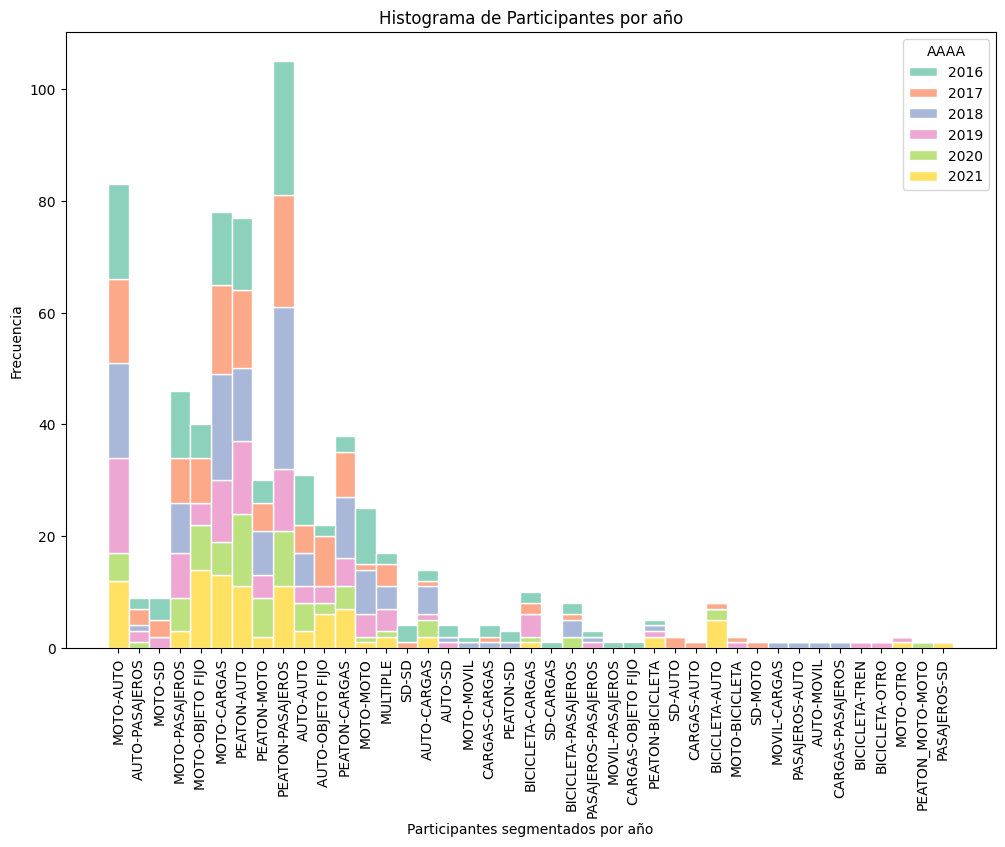

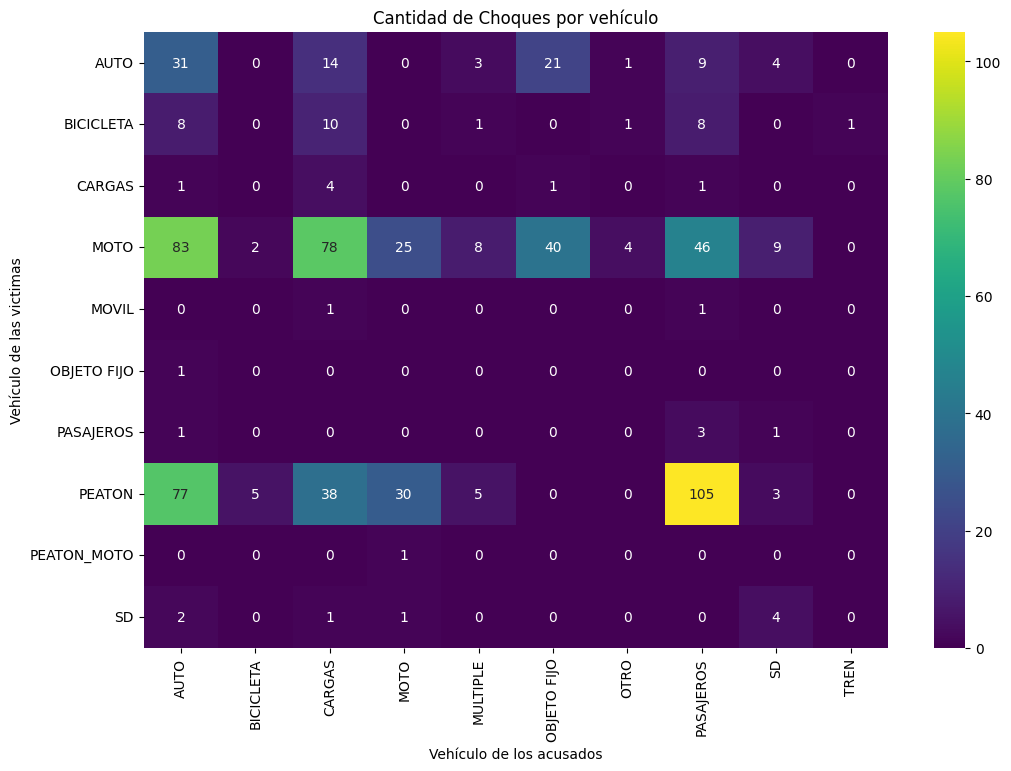

In [12]:
plt.figure(figsize=(12, 8))
sns.histplot(data=hechos, x='PARTICIPANTES', bins=20, multiple='stack', edgecolor='white', hue='AAAA', palette='Set2')
plt.title('Histograma de Participantes por año')
plt.xlabel('Participantes segmentados por año')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

vehiculos_victima = hechos['VICTIMA'].dropna()
vehiculos_acusado = hechos['ACUSADO'].dropna()

df_frecuencia = pd.crosstab(vehiculos_victima, vehiculos_acusado)

plt.figure(figsize=(12, 8))
sns.heatmap(df_frecuencia, annot=True, cmap='viridis', fmt='d')
plt.title('Cantidad de Choques por vehículo')
plt.xlabel('Vehículo de los acusados')
plt.ylabel('Vehículo de las victimas')
plt.show()

### Análisis por Comuna

### Siniestros por Comuna a lo largo de los años
###
#### A. Comunas con mayor índice. 

* La comuna 1 es la más concurrida de la ciudad, siendo esta el centro financiero, turístico y sede de importantes edificios a nivel nacional y ciudad.

* Al ser una comuna muy concurrida por muchas razones, es la de mayores probabilidades de que esta siga siendo así.

* a comuna 4 posee las avenidas Coronel Roca y Coronel Francisco Ravanal así cómo la avenida Perito Moreno, éstas al ser las arterias que comunican a la comuna con otros barrios de la ciudad pueden ser centro de siniestros viales gracias a la cantidad de vehículos que circulan a diario. Un análisis similar puede ser aplicado a la comuna 9.
###
#### B. Comunas con menor índice.

* La comuna con menor registro de siniestros es la comuna 6 seguido de cerca por la comuna 5.

* La comuna 6 (cuyo barrio es Caballito) se destaca por ser una zona residencial y con gran catidad de espacios verdes.

* Es un barrio que cuenta con diversas vías de transporte que ayudan a recorrer el mismo barrio como los demás de la ciudad: Amplias avenidas, el ferrocarril Sarmiento y el puente para automóviles, sin mencionar las líneas A y E del subte.
###

#### C. Se puede ver que los indices de siniestro baja con respecto al paso de los años.

* Esto se debe a la continua implementación de mejoras de la ciudad.

#### D. Desde el año 2019 se bajó drásticamente el número de siniestros en varias de las comunas que contaban con más números de ellos.

* En ese año se reforzaron los controles y la creación de infraestructura vial de manera específica a las necesidades de cada vehículo.

#### E. En 2021 la comuna 4 y la comuna 9 sobrepasaron a la comuna 1.

* La mayoría de esos siniestros ocurrieron en avenidas.

* Ese año se llevaron a cabo modificaciones en distintas avenidas, por lo que pudo haber reducción del camino que pudo haber afectado al paso.

* Este hecho se puede considerar un **Outlier**, ya que no será común que este hecho siga siendo así en posteriores años.

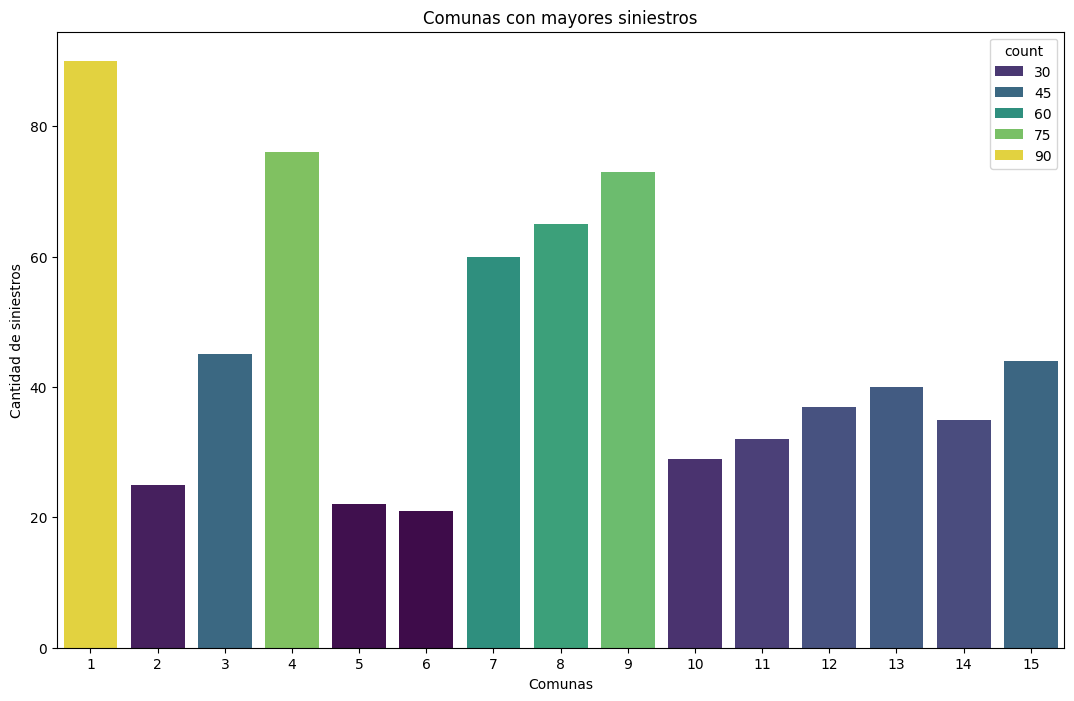

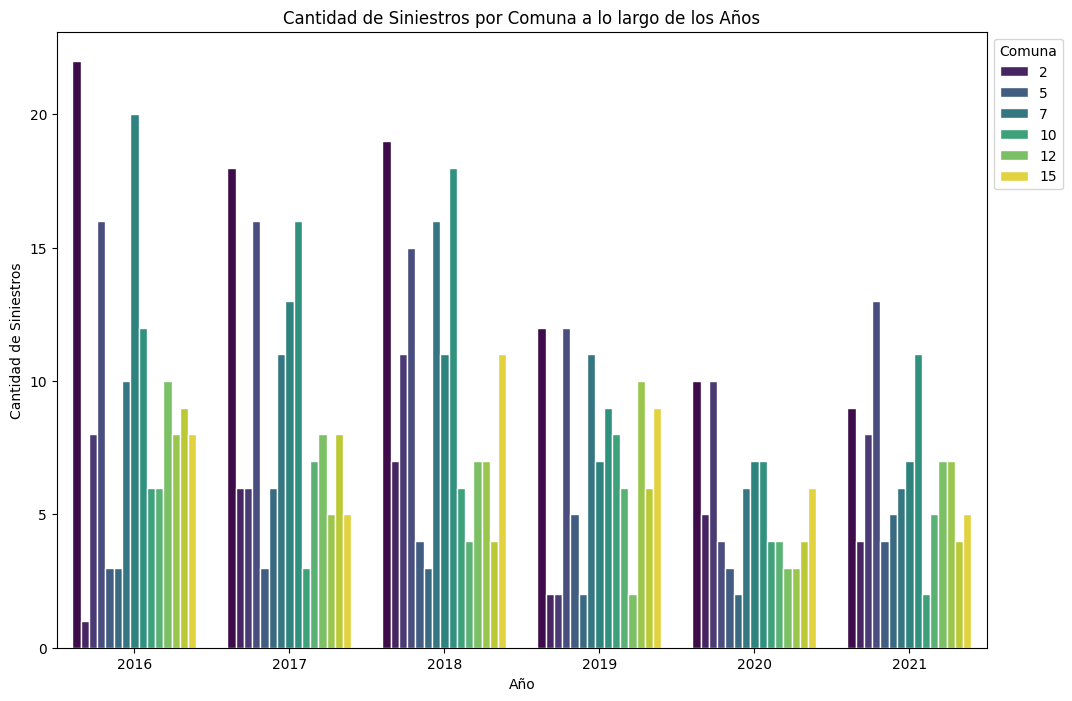

In [14]:
frecuencia_comunas = hechos['COMUNA'].value_counts()

plt.figure(figsize=(13, 8))
sns.barplot(x=frecuencia_comunas.index, y=frecuencia_comunas.values, hue=frecuencia_comunas, palette='viridis')
plt.title('Comunas con mayores siniestros')
plt.xlabel('Comunas')
plt.ylabel('Cantidad de siniestros')
plt.show()

siniestros = hechos.groupby(['AAAA', 'COMUNA']).size().reset_index(name='CANTIDAD_SINIESTROS')

plt.figure(figsize=(12, 8))
sns.barplot(x='AAAA', y='CANTIDAD_SINIESTROS', data=siniestros, hue='COMUNA', palette='viridis', edgecolor='white')
plt.title('Cantidad de Siniestros por Comuna a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Cantidad de Siniestros')
plt.legend(title='Comuna', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Victimas y Acusados por Comuna
###
* Las comunas 1 y 4 son las más peligrosas hacia el peatón.

* Las comunas 1, 4 y 9 son las más peligrosas para las motos.

* Las comunas 8 y 9 tienen valores más altos de lo normal de autos.
#
* En la comuna 1, el vehiculo con mayor tendencia a siniestros son los transporte de pasajeros.

* En la comuna 4, el vehiculo con mayor tendencia a siniestros son los transporte de cargas, seguido de cerca por el de pasajeros.

* En la comuna 7, el vehiculo con mayor tendencia a siniestros son los autos.

* En la comuna 9, el vehiculo con mayor tendencia a siniestros son los autos seguido por los transporte de cargas.

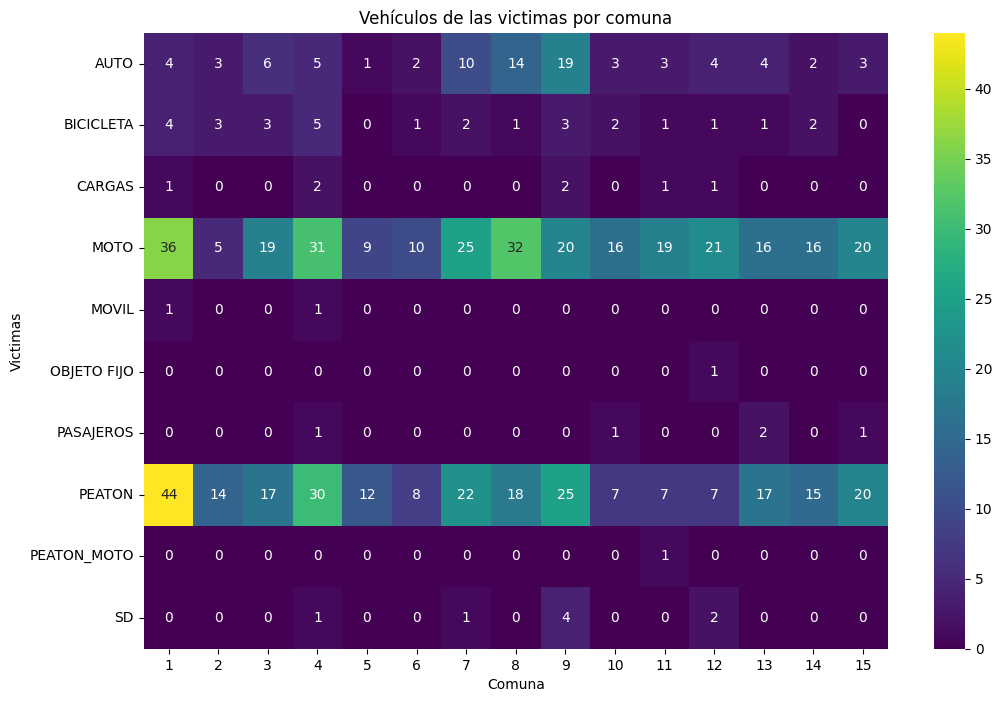

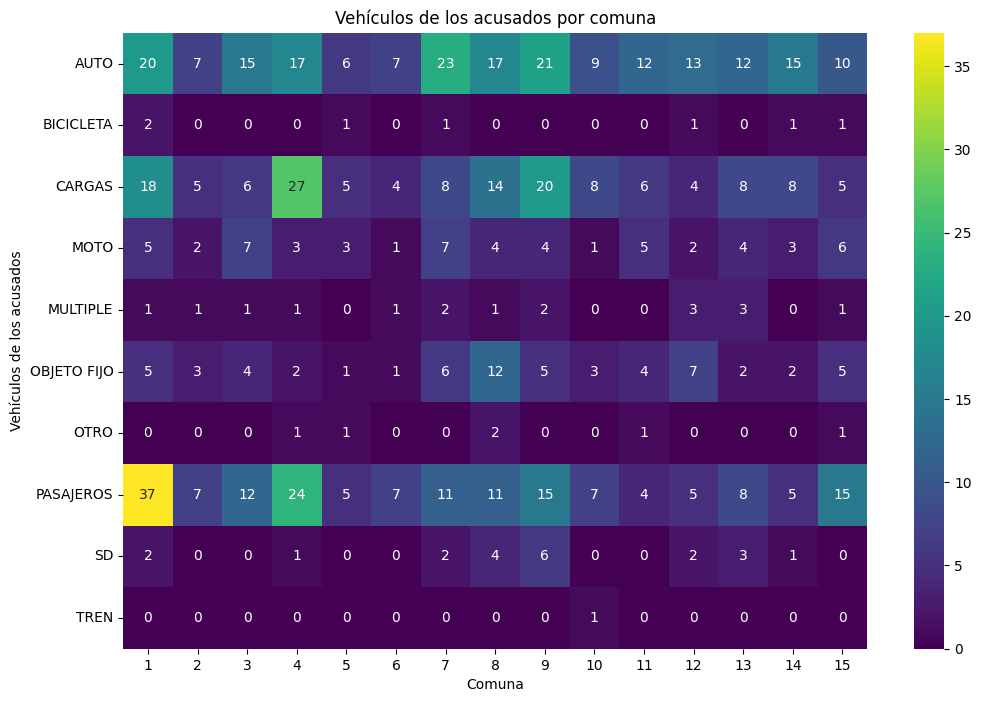

In [11]:
vehiculos_victima = hechos['VICTIMA'].dropna()
comuna = hechos['COMUNA'].dropna()

df_frecuencia = pd.crosstab(vehiculos_victima, comuna)

plt.figure(figsize=(12, 8))
sns.heatmap(df_frecuencia, annot=True, cmap='viridis', fmt='d')
plt.title('Vehículos de las victimas por comuna')
plt.xlabel('Comuna')
plt.ylabel('Victimas')
plt.show()

comuna = hechos['COMUNA'].dropna()
vehiculos_acusado = hechos['ACUSADO'].dropna()

df_frecuencia = pd.crosstab(vehiculos_acusado, comuna)

plt.figure(figsize=(12, 8))
sns.heatmap(df_frecuencia, annot=True, cmap='viridis', fmt='d')
plt.title('Vehículos de los acusados por comuna')
plt.xlabel('Comuna')
plt.ylabel('Vehículos de los acusados')
plt.show()

### Análisis por Tipo de Calle

#### A. La mayoría de accidentes se provocan en Avenidas.

* Si bien en la comuna 1 se provocan la mayoría de siniestros, la comuna 4 y 7 no se quedan atrás.

* Se nota que bajó el índice de siniestros en 2019, cómo anteriormente se había expuesto, pero no lo suficiente y en 2021 volvió a subir.


#### B. En la Gral. Paz se produjeron mayores siniestros en la comuna 12.

* La avenida Gral. Paz se extiende en algunas comunas.

* Es una avenida muy trancitada, por lo que se entiende que al ser una sola avenida tenga tantos casos.

#### C. Tendencia a suba de casos 

* En los últimos años se muestra que los valores de Avenida, Gral. Paz y Autopista están en subida.

* Los  valores de Calle parecen estar en baja.

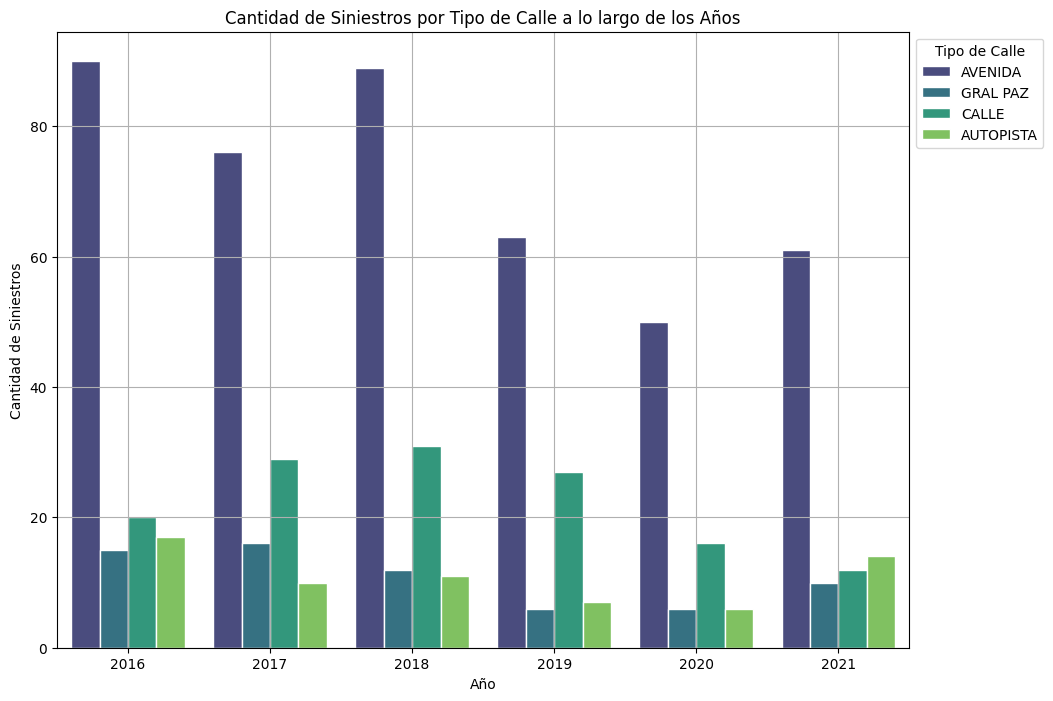

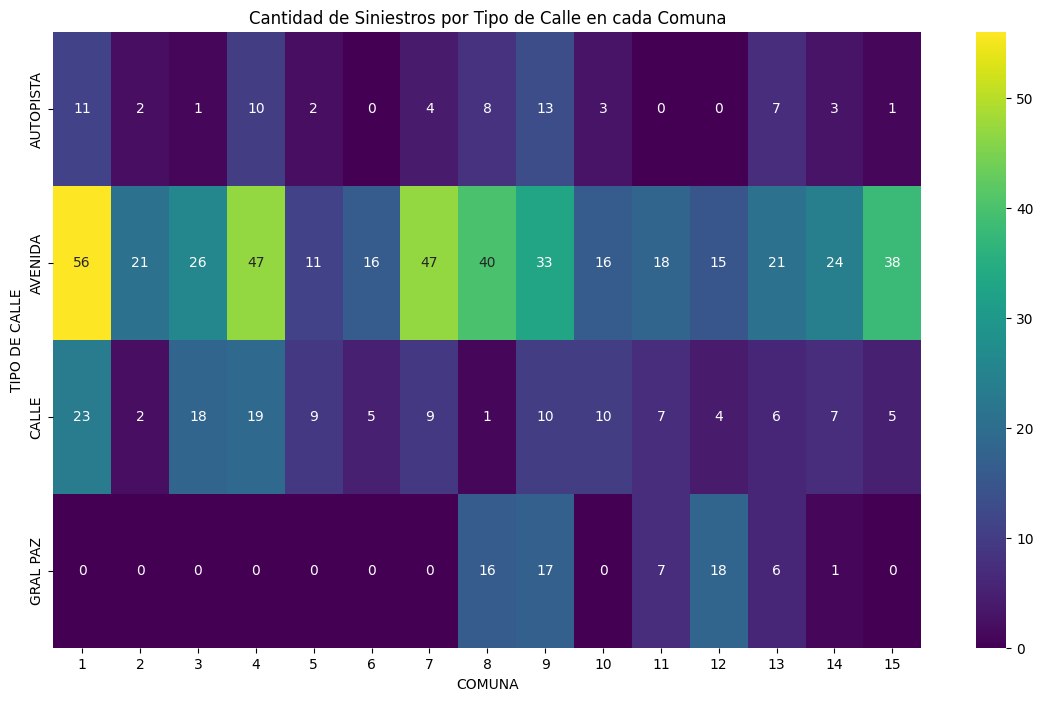

In [22]:
plt.figure(figsize=(11, 8))
sns.countplot(x='AAAA', hue='TIPO_DE_CALLE', data=hechos, palette='viridis', edgecolor='white')

plt.title('Cantidad de Siniestros por Tipo de Calle a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Cantidad de Siniestros')
plt.grid(True)
plt.legend(title='Tipo de Calle', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

df_frecuencia = pd.crosstab(hechos['TIPO_DE_CALLE'],hechos['COMUNA'])

plt.figure(figsize=(14, 8))
sns.heatmap(df_frecuencia, annot=True, cmap='viridis', fmt='d')
plt.title('Cantidad de Siniestros por Tipo de Calle en cada Comuna')
plt.xlabel('Comuna')
plt.ylabel('Tipo de calle')
plt.show()

### Victimas y Acusados por Tipo de Calle
###


#### A. Gran cantidad de victimas en avenidas son motos y peatones.

* Hay mucha diferencia entre los registros de motos y peatones con los demás vehículos de las victimas.

* Esto sugiere un patrón de riesgo potencial en las avenidas hacia los peatones y motociclistas.

#### B. Acusados en avenidas.

* A diferencia de lo que pasa con las victimas, con los acusados, hay más variedad en los casos pero los vehículos de pasajeros y los automóviles superan en gran manera al resto.

* En avenidas, es donde más ocurren siniestros múltiples, siniestros en donde el acusado sea motociclista o vehículos de carga y siniestros con objetos fijos.

* Todo esto, más lo anteriormente expuesto, sugiere un patrón de riesgo hacia este tipo de calle.

#### C. Vehículos de carga.

* Si bien no figura en la mayoría de casos, sigue siendo un peligro potencial, teniendo su pico en avenidas, pero figurando siempre como uno de los acusados con mayores casos.

* En autopistas figura como el de mayor cantidad de casos.

#### D. Motociclistas.

* Tienen el podio de ser los mayores vehículos que figura cómo victimas.

* A la vez, siguen teniendo valores altos cómo acusados.

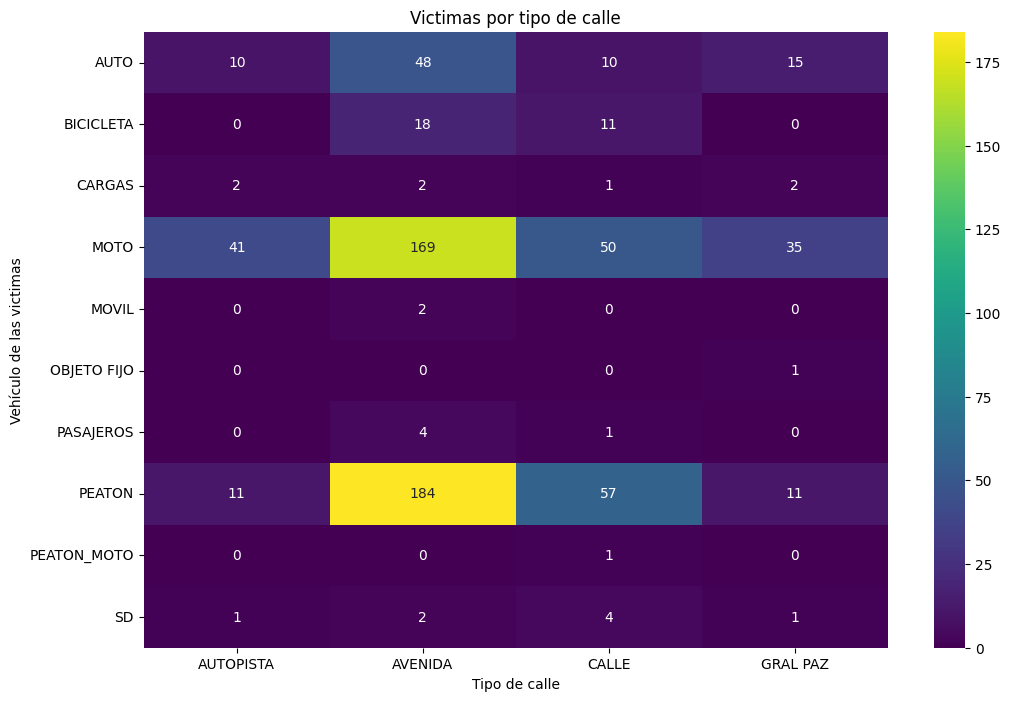

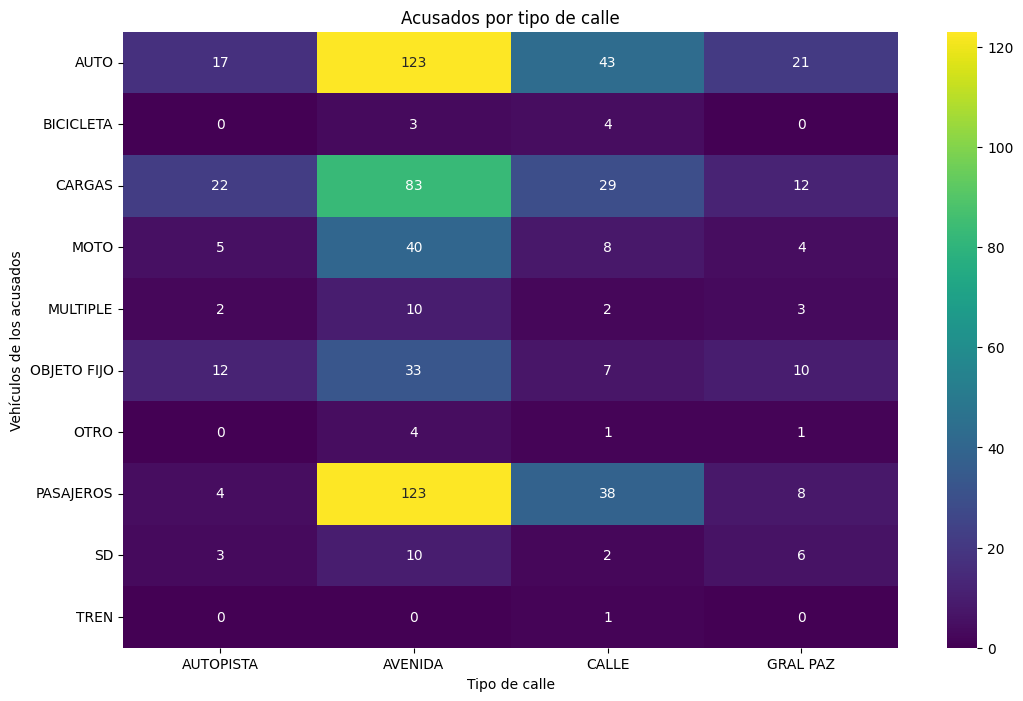

In [10]:
vehiculos_victima = hechos['VICTIMA'].dropna()
calles = hechos['TIPO_DE_CALLE'].dropna()

df_victima = pd.crosstab(vehiculos_victima, calles)

# Crear un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(df_victima, annot=True, cmap='viridis', fmt='d')
plt.title('Victimas por tipo de calle')
plt.xlabel('Tipo de calle')
plt.ylabel('Vehículo de las victimas')
plt.show()


vehiculos_acusado = hechos['ACUSADO'].dropna()

df_acusados = pd.crosstab(vehiculos_acusado, calles)

plt.figure(figsize=(12.5, 8))
sns.heatmap(df_acusados, annot=True, cmap='viridis', fmt='d')
plt.title('Acusados por tipo de calle')
plt.xlabel('Tipo de calle')
plt.ylabel('Vehículos de los acusados')
plt.show()

### Tipo de Calle por Hora

> Atención: Hay valores SD (Sin Dato) que, con motivo del tipo del gráfico, cambié el strimg 'SD' al entero 25.

#### A. Horas de mayor tránsito.

* Parece ser que hay cierta paridad con los horarios de los casos, aunque hay gran cantidad de registros a las 6hs y 7hs en las avenidas.

* Si bien este gráfico no demustra una tendencia positiva en base a los horarios, sí muestra una tendencia en base al tipo de calle y la sobrepoblación de vehículos.

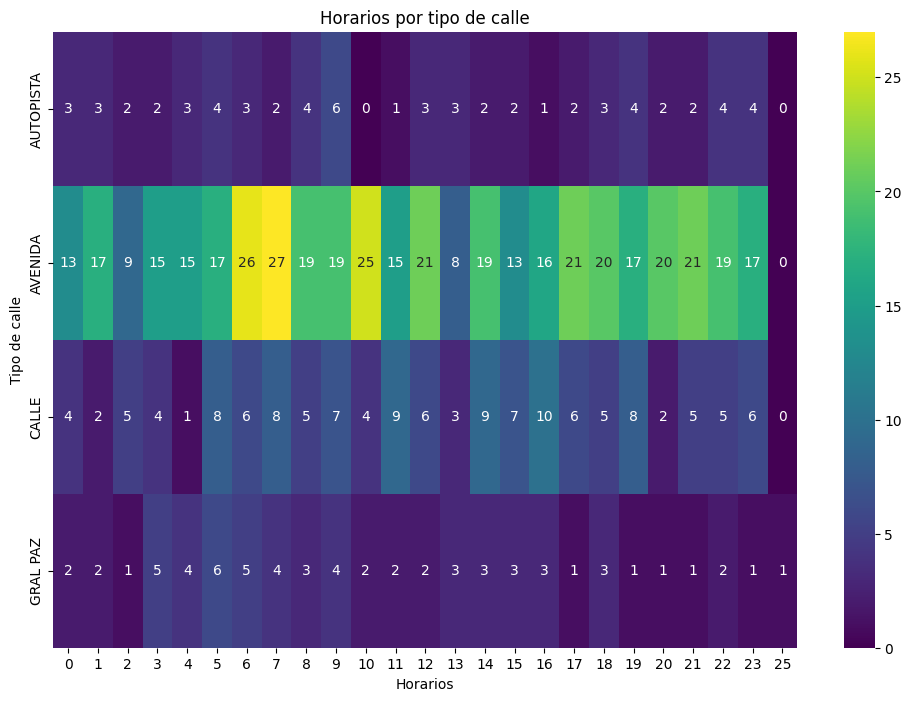

In [5]:
horas = hechos
horas['HH'] = horas['HH'].replace('SD',25)
horas = horas['HH'].dropna().astype(int)
calles = hechos['TIPO_DE_CALLE'].dropna()

df_victima = pd.crosstab(calles, horas)

plt.figure(figsize=(12, 8))
sns.heatmap(df_victima, annot=True, cmap='viridis', fmt='d')
plt.title('Horarios por tipo de calle')
plt.xlabel('Horarios')
plt.ylabel('Tipo de calle')
plt.show()

### Comparación por Sexo de las victimas y su vehículo en el siniestro.

#### A. La mayoría de las victimas son Hombres.

* Mientras que los Hombres superan los 500 casos, las mujeres no llegan a los 200. Por lo que hay una claro patrón.

#### B. El vehículo más repetido en los registros de hombres son de Motos.

* Mientras que el más repetido para las mujeres son los peatones (Que también está muy por debajo de su contraparte masculina).

* El hecho de que los hombres tengan mucha diferencia, y más con este vehículo, nos habla de un patrón muy claro de **Falta de educación vial**.

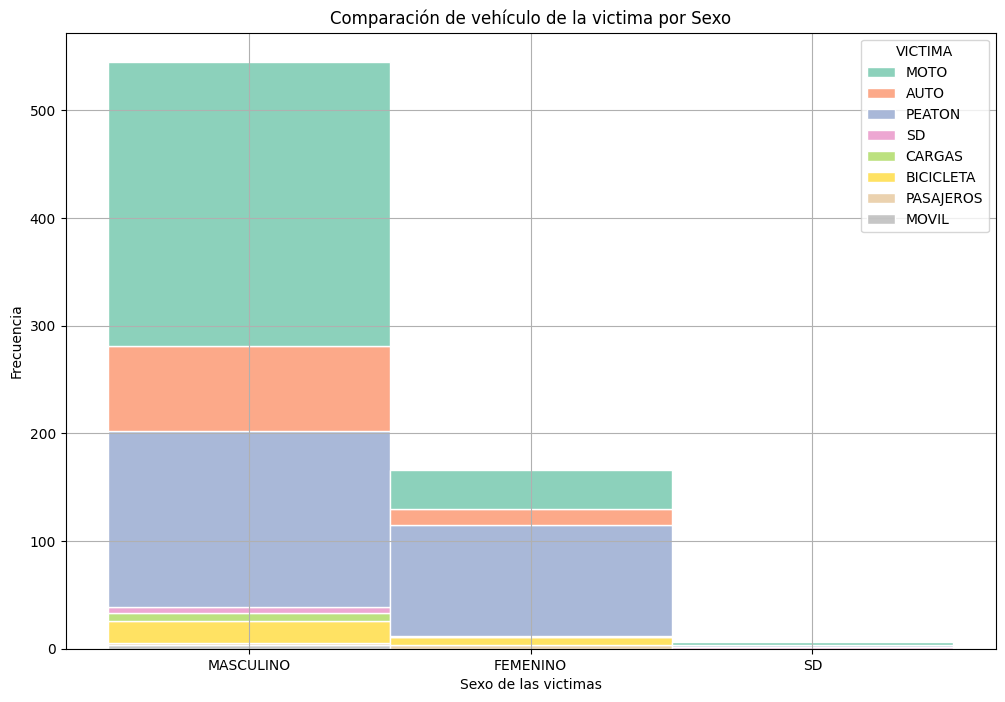

In [9]:
plt.figure(figsize=(12, 8))
sns.histplot(data=victimas, x='SEXO', bins=20, multiple='stack', hue='VICTIMA', palette='Set2', edgecolor='white')
plt.title('Comparación de vehículo de la victima por Sexo')
plt.xlabel('Sexo de las victimas')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

### Comparación por Edad de las victimas, su vehículo y tipo de calle.

#### A. La mayoría de las victimas rondan los 20 y 40 años.

* La gran mayoría se encontraban en motos.

* Superan con bastante diferencia los demás grupos etarios (Tener en cuenta que la columna '60 +' representa a personas entre 60 y 99 años, por lo que hay bastantes personas representadas.)

#### B. Rol de las victimas.

* La mayor cantidad de victimas son peatones.

* Hasta los 50 años, hay más probabilidades de que la victima sea conductor.

* Mientras más aumenta la edad, más crece la posibilidad de que la victima sea un peatón.

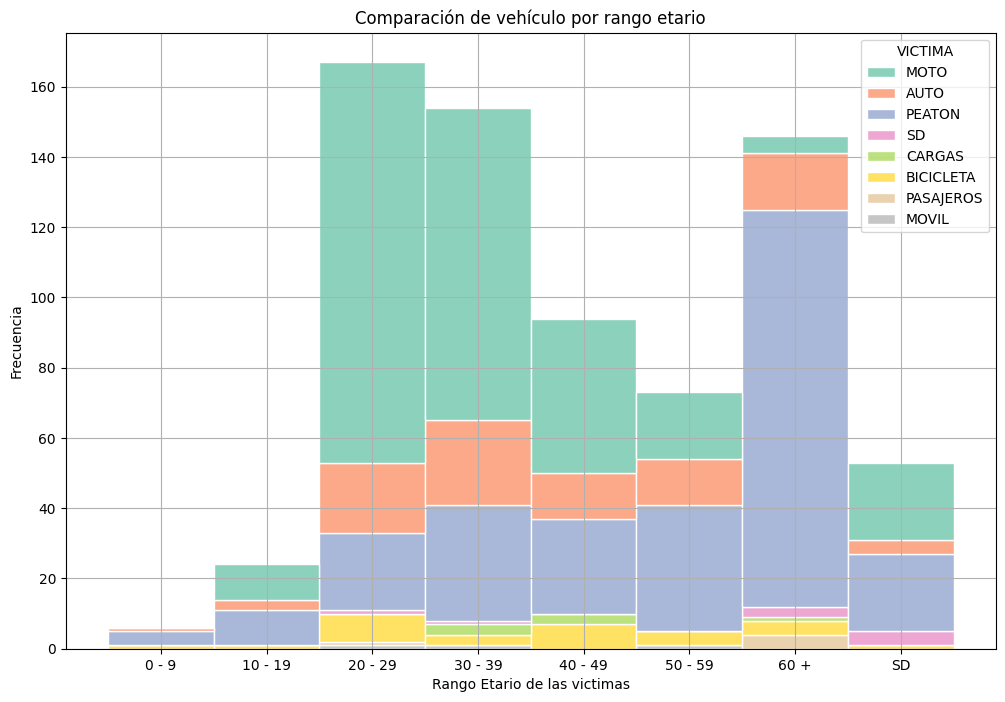

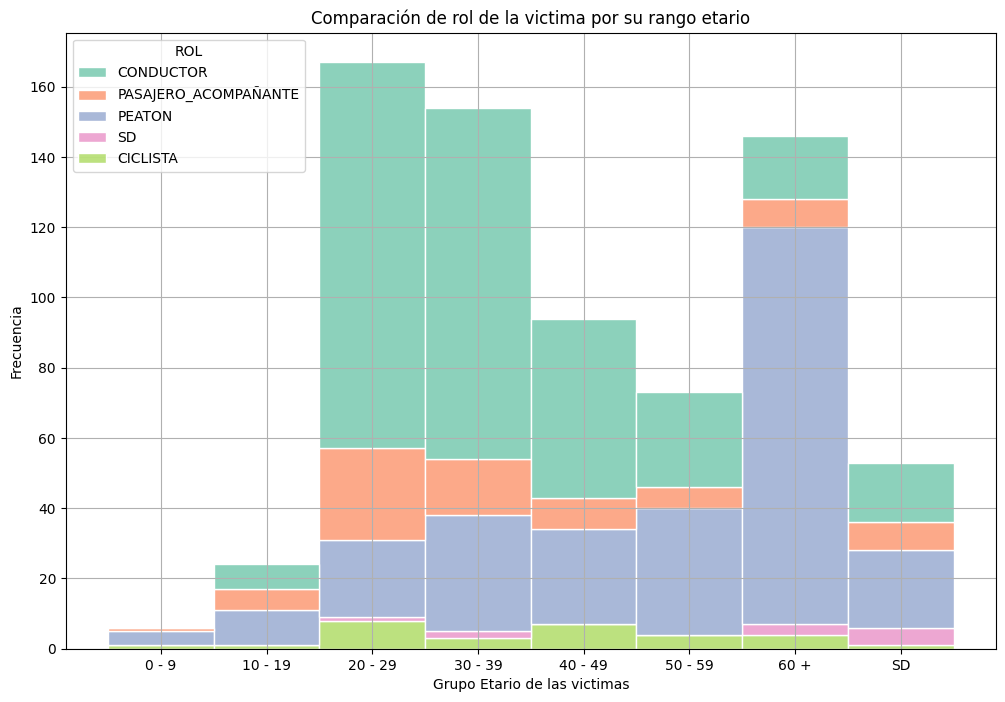

In [8]:
# Creo una nueva columna que representa el grupo etario
victimas['GRUPO ETARIO'] = np.nan
victimas['EDAD'] = pd.to_numeric(victimas['EDAD'], errors='coerce')
bins = [0, 9, 19, 29, 39, 49, 59, np.nan,np.inf]
labels = ['0 - 9', '10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 +', 'SD']
victimas['GRUPO ETARIO'] = pd.cut(victimas['EDAD'], bins=bins, labels=labels, right=False)
victimas['GRUPO ETARIO'] = victimas['GRUPO ETARIO'].fillna('SD')
 
plt.figure(figsize=(12, 8))
sns.histplot(data=victimas, x='GRUPO ETARIO', bins=20, multiple='stack', hue='VICTIMA', palette='Set2', edgecolor='white')
plt.title('Comparación de vehículo por rango etario')
plt.xlabel('Rango Etario de las victimas')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data=victimas, x='GRUPO ETARIO', bins=20, multiple='stack', hue='ROL', palette='Set2', edgecolor='white')
plt.title('Comparación de rol de la victima por su rango etario')
plt.xlabel('Grupo Etario de las victimas')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

### Edad por Comuna

#### A. Sexo de las victimas y las comunas.

* No parece haber nada que contradiga lo que veníamos viendo, los hombres son los que más tieneden a ser victimas de siniestros, llegan a picos en la comun 1, 4 y 9.

* Los registros en donde se reportan mujeres siendo las victimas parecen tener valores similares, llegando a su pico en la comuna 9 con 17 siniestros contados.


#### B. Edad de las victimas y las comunas.

* No hay mucha diferencia en la edad de las victimas con respecto a la comuna.

* Si bien el pico está en 26 registros contados en la 4 de edades entre 20 y 29 años, no podemos decir que hay una tendencia hacia ello ya que los demás registros pueden llegar a rondar esas cifras.

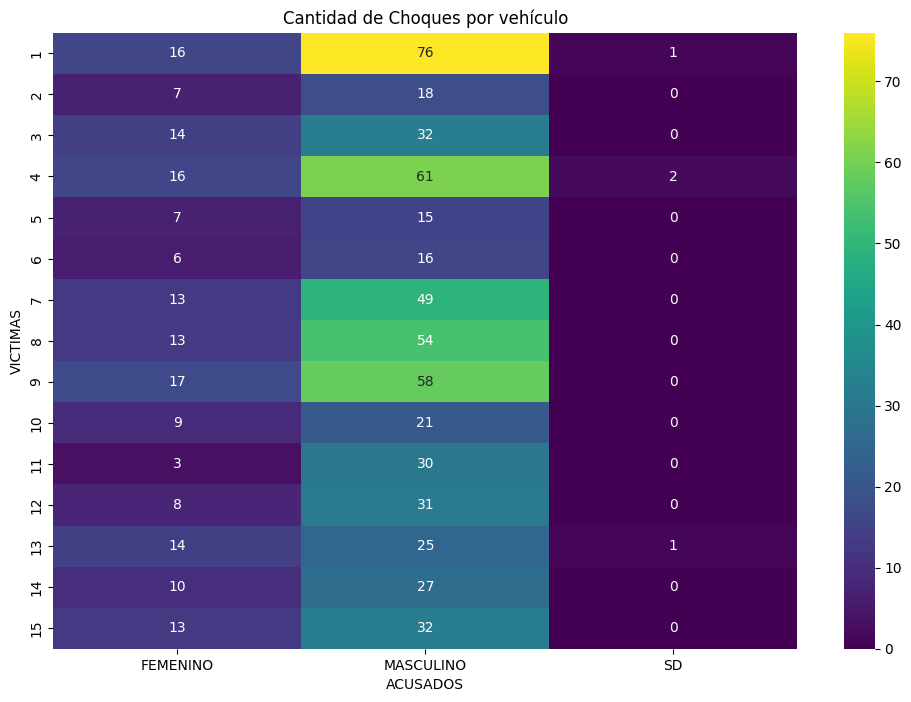

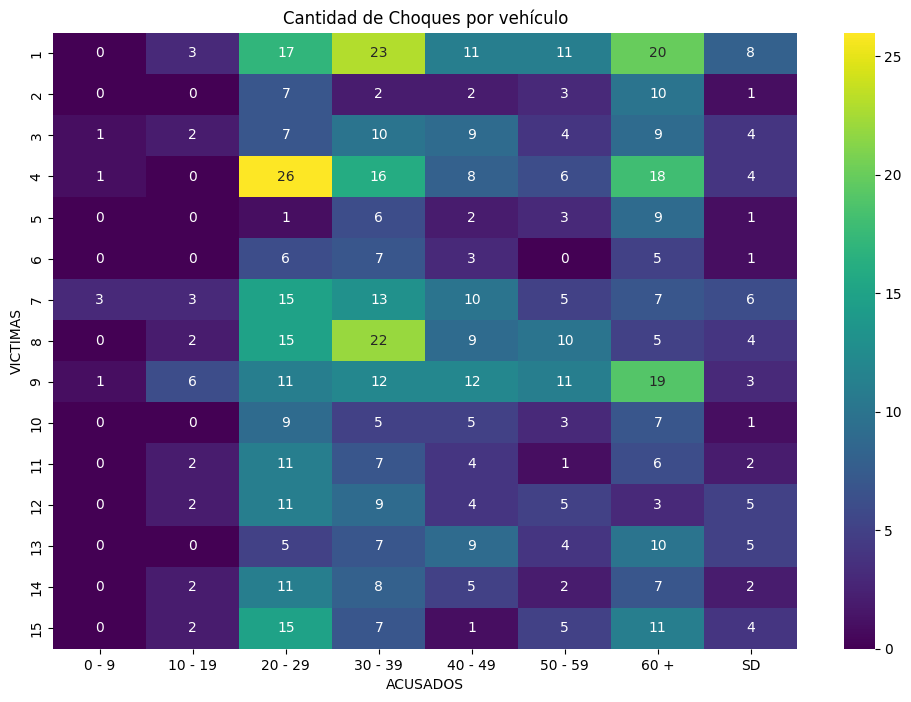

In [6]:
comunas = pd.merge(victimas[['ID_hecho','GRUPO ETARIO','SEXO']], hechos[['ID','COMUNA','TIPO_DE_CALLE']], left_on='ID_hecho',right_on='ID', how='inner')

df_comuna = pd.crosstab(comunas['COMUNA'], comunas['SEXO'])

plt.figure(figsize=(12, 8))
sns.heatmap(df_comuna, annot=True, cmap='viridis', fmt='d')
plt.title('Compración de la comuna por sexo de la victima.')
plt.xlabel('Edad')
plt.ylabel('Comuna')
plt.show()

df_comuna2 = pd.crosstab(comunas['COMUNA'], comunas['GRUPO ETARIO'])

plt.figure(figsize=(12, 8))
sns.heatmap(df_comuna2, annot=True, cmap='viridis', fmt='d')
plt.title('Comparaci´pn de la comuna por rango etario de la victima.')
plt.xlabel('Rango Etario')
plt.ylabel('Comuna')
plt.show()

#### Fuentes:

Comuna 1:

    http://ssplan.buenosaires.gob.ar/dmdocuments/comuna_01.pdf

Comuna 4:

    http://ssplan.buenosaires.gob.ar/dmdocuments/comuna_04.pdf

Comuna 9:

    http://ssplan.buenosaires.gob.ar/dmdocuments/comuna_09.pdf

Comuna 6:

    http://ssplan.buenosaires.gob.ar/dmdocuments/comuna_06.pdf

Baja de los siniestros en 2019:

    https://buenosaires.gob.ar/noticias/en-2019-bajaron-30-las-victimas-fatales-en-siniestros-viales 

Comuna 4 en 2021: \n

    https://buenosaires.gob.ar/noticias/obras-de-seguridad-vial-en-el-centro-de-trasbordo-saenz 
